In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Minimizer, minimize, Parameters, report_fit, fit_report, printfuncs


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 301
    # variables        = 4
    chi-square         = 11.9983210
    reduced chi-square = 0.04039839
    Akaike info crit   = -961.925405
    Bayesian info crit = -947.096964
[[Variables]]
    amp:    5.01031283 +/- 0.04000482 (0.80%) (init = 10)
    decay:  0.02565158 +/- 4.6803e-04 (1.82%) (init = 0.1)
    shift: -0.09381801 +/- 0.01026478 (10.94%) (init = 0)
    omega:  2.00062858 +/- 0.00331902 (0.17%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.785
    C(amp, decay)   =  0.584
    C(amp, shift)   = -0.120


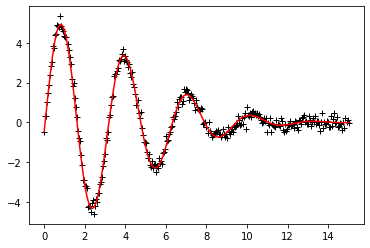

In [2]:
# 2021-07-08
# https://lmfit.github.io/lmfit-py/parameters.html

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=x.size, scale=0.2))


# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
params.add('omega', value=3.0)

# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    import matplotlib.pyplot as plt
    plt.plot(x, data, 'k+')
    plt.plot(x, final, 'r')
    plt.show()
except ImportError:
    pass
# <end of examples/doc_parameters_basic.py>

In [3]:
result

In [4]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_statistics',
 '_repr_html_',
 'aborted',
 'aic',
 'bic',
 'call_kws',
 'chisqr',
 'covar',
 'errorbars',
 'flatchain',
 'ier',
 'init_vals',
 'init_values',
 'last_internal_values',
 'lmdif_message',
 'message',
 'method',
 'ndata',
 'nfev',
 'nfree',
 'nvarys',
 'params',
 'redchi',
 'residual',
 'show_candidates',
 'success',
 'var_names']

In [5]:
result

In [6]:
# https://lmfit.github.io/lmfit-py/fitting.html
# <examples/doc_fitting_withreport.py>

p_true = Parameters()
p_true.add('amp', value=14.0)
p_true.add('period', value=5.46)
p_true.add('shift', value=0.123)
p_true.add('decay', value=0.032)


def residual(pars, x, data=None):
    """Model a decaying sine wave and subtract data."""
    vals = pars.valuesdict()
    amp = vals['amp']
    per = vals['period']
    shift = vals['shift']
    decay = vals['decay']

    if abs(shift) > np.pi/2:
        shift = shift - np.sign(shift)*np.pi
    model = amp * np.sin(shift + x/per) * np.exp(-x*x*decay*decay)
    if data is None:
        return model
    return model - data


np.random.seed(0)
x = np.linspace(0.0, 250., 1001)
noise = np.random.normal(scale=0.7215, size=x.size)
data = residual(p_true, x) + noise

fit_params = Parameters()
fit_params.add('amp', value=13.0)
fit_params.add('period', value=2)
fit_params.add('shift', value=0.0)
fit_params.add('decay', value=0.02)

out = minimize(residual, fit_params, args=(x,), kws={'data': data})

print(fit_report(out))
# <end examples/doc_fitting_withreport.py>

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 1001
    # variables        = 4
    chi-square         = 498.811759
    reduced chi-square = 0.50031270
    Akaike info crit   = -689.222517
    Bayesian info crit = -669.587497
[[Variables]]
    amp:     13.9121945 +/- 0.14120288 (1.01%) (init = 13)
    period:  5.48507045 +/- 0.02666492 (0.49%) (init = 2)
    shift:   0.16203677 +/- 0.01405661 (8.67%) (init = 0)
    decay:   0.03264538 +/- 3.8014e-04 (1.16%) (init = 0.02)
[[Correlations]] (unreported correlations are < 0.100)
    C(period, shift) =  0.797
    C(amp, decay)    =  0.582
    C(amp, shift)    = -0.297
    C(amp, period)   = -0.243
    C(shift, decay)  = -0.182
    C(period, decay) = -0.150


In [7]:
# To be clear, you can get at all of these values from the fit result out and out.params.
# For example, a crude printout of the best fit variables and standard errors could be done as

In [8]:
print('-------------------------------')
print('Parameter    Value       Stderr')
for name, param in out.params.items():
    print('{:7s} {:11.5f} {:11.5f}'.format(name, param.value, param.stderr))

-------------------------------
Parameter    Value       Stderr
amp        13.91219     0.14120
period      5.48507     0.02666
shift       0.16204     0.01406
decay       0.03265     0.00038
